<a href="https://colab.research.google.com/github/TeekhathatTT/TeekhathatTT-SuperAI-Cloud-Recognition/blob/main/cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
data = []
for filename in os.listdir('/content/hackathon-online-cloud-recognition/images/train'):
    if filename.endswith("jpg"):
        print(filename)
        data.append(filename)

e2fca88bfd718bb371d2d4114d7c7633.jpg
ee0351d96022afb52a510a052ea8ed9a.jpg
e1e9560ba95cb4465f5e253ede2b3ae6.jpg
e84757c5d357d58e9ebff317b3aa8eda.jpg
a4d0b727b3f4f8c1e1ed63dde455dcba.jpg
03189ecb86e6ab50a52b4219079ec281.jpg
772fbca7d82fef16a64c25b8e9cfc7e4.jpg
f8b398e8530d6550f91b416d409b4793.jpg
856038e70e2ed8dd5897da40b83098c8.jpg
926365bffee41128d65a127cad1c16f0.jpg
61dac0b26abed6d8982f722068fb7096.jpg
f31e32160a756a3dcb2bfddfd17291b6.jpg
e46863991e86a8ce2e86dee0622a7ad3.jpg
f33de03c97e1c28627bba297c4c34c06.jpg
a874cf9abb0bc4c30c5837e51918be43.jpg
d1e98777b3b671d4042ce15d7b42b015.jpg
ec1c8f56bd292d597af87464127c198b.jpg
8005d843e5d855a7d56e37c050117a15.jpg
f8f0337252c5af532ce0be194c90415a.jpg
e58e67e11c5a4dcfbed99257fa89e748.jpg
a1d0809805724e6f60d98566dfe536cd.jpg
22f8406f96ef5fb476422428f99beea0.jpg
4612a76cf29fc6c2df65a185b0a0c677.jpg
d6ab11f3a8d89776f0ec24463b720b1c.jpg
60503ce50015cb389e4fc9c79d972401.jpg
82b875673ebfae08cb88aa8d0375129e.jpg
96aa7120d7980ff73c8189a53d557295.jpg
5

In [7]:
import pandas as pd
df=pd.read_csv('/content/hackathon-online-cloud-recognition/train.csv')

In [ ]:
df=df[1:]

In [8]:
df

,id,label
0,f164dae2e2cdd4e5411e93a8dc95d142.jpg,3
1,588083bc2555da85c1db7e8abd9d6922.jpg,1
2,dd20037db2aa28f7b617bbf5f6754470.jpg,2
3,a6d1c3b86279c54afd4e2fdf0b88111a.jpg,2
4,8989be70528a5ff4cfa6d098afb5722e.jpg,1
...,...,...
955,71887a10482a6a64043a210132a22a0d.jpg,5
956,08583d3ab0b1dfabce632b2d545b80e0.jpg,2
957,eba41f3ef7334728d94852e1f1eee5a9.jpg,3
958,fbcf3d1c87e12b5e0c81cb1bfdbf3afe.jpg,2


In [ ]:
df['id'][1]

'588083bc2555da85c1db7e8abd9d6922.jpg'

In [9]:
import shutil

In [10]:
import os
import cv2
import numpy as np

In [11]:
test_list = os.listdir('/content/hackathon-online-cloud-recognition/images/test')

In [12]:
def remove_sky(image_path):

    image = cv2.imread(image_path)

    image = cv2.resize(image,(64,64))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


    lower_sky = np.array([80, 50, 50])
    upper_sky = np.array([120, 255, 255])


    mask = cv2.inRange(hsv, lower_sky, upper_sky)


    result = cv2.bitwise_and(image, image, mask=mask)


    return result


In [ ]:
for k in test_list:
  source_file = '/content/hackathon-online-cloud-recognition/images/test/' +str(k)
  destination_folder = '/content/drive/MyDrive/superai/test_data_gray/' +str(k)+ '.jpg'

  im_gray = cv2.imread(source_file, cv2.IMREAD_GRAYSCALE)
  cv2.imwrite(destination_folder,im_gray)

In [ ]:
# for k in test_list:
#   source_file = '/content/hackathon-online-cloud-recognition/images/test/' +str(k)
#   destination_folder = '/content/drive/MyDrive/superai/test_data_binary/' +str(k)+ '.jpg'

#   cv2.imwrite(destination_folder, remove_sky(source_file))

In [ ]:
# for i in range(0,len(df)):
#   source_file = '/content/hackathon-online-cloud-recognition/images/train/'+str(df['id'][i])
#   destination_folder = '/content/drive/MyDrive/superai/train_data_binary/'+str(df['label'][i])+'/'+ str(df['id'][i])+ '.jpg'

#   cv2.imwrite(destination_folder, remove_sky(source_file))


In [27]:
for i in range(0,len(df)):
  source_file = '/content/hackathon-online-cloud-recognition/images/train/'+str(df['id'][i])
  destination_folder = '/content/drive/MyDrive/superai/train_04/'+str(df['label'][i])+'/'+ str(df['id'][i])+ '.jpg'

  im_gray = cv2.imread(source_file, cv2.IMREAD_GRAYSCALE)
  cv2.imwrite(destination_folder,im_gray)

  # shutil.move(source_file, destination_folder)

In [ ]:
#/content/drive/MyDrive/superai/train_data

In [ ]:
# train_path = '/content/hackathon-online-cloud-recognition/images/train'

In [28]:
import os
from pathlib import PosixPath
import random
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from PIL import Image

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers


In [76]:
data_path = "/content/drive/MyDrive/superai/train_data_gray/"
data_dir = PosixPath(data_path)

In [77]:
image_count = len(list(data_dir.glob("*/*"))) #list path
print(f"Image count: {image_count}")

Image count: 960


In [78]:
random.seed(123)
seed = random.randint(0,100)
print(f"Current seed : {seed}")

Current seed : 6


In [79]:
batch_size = 32
width = 64
height = 64

In [80]:
train_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height,width),
    batch_size=batch_size
)

Found 960 files belonging to 7 classes.
Using 768 files for training.


In [81]:
classes_count = len(train_dataset.class_names)
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

Class names: ['0', '1', '2', '3', '4', '5', '6']


In [82]:
val_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 960 files belonging to 7 classes.
Using 192 files for validation.


In [83]:
data_augmentation = Sequential(
    layers=[
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(height,width,3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
        ],
    name="data_augmentation"
    )

In [85]:
def model_builder():
    model = Sequential()

    base_model = tf.keras.applications.MobileNet(input_shape=(width,height,3), weights="imagenet",include_top=False)

    model.add(data_augmentation)

    model.add(base_model)

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(units=256, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=256, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=128, activation="relu"))
    model.add(layers.Dropout(0.2))
    # model.add(layers.Dense(units=128, activation="relu"))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.Dense(units=64, activation="relu"))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.Dense(units=512, activation="relu"))
    # model.add(layers.Dropout(0.2))
    # Final output : probabilities
    model.add(layers.Dense(classes_count, activation="softmax",name="final_output"))

    model.compile(
        optimizer= optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

    return model

In [86]:
model = model_builder()
print(f"Model : {model}")

Model : <keras.engine.sequential.Sequential object at 0x7f77ac2df940>


In [87]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=15,
    mode ="max",
    verbose=2,
    restore_best_weights=True
)

In [40]:
history = model.fit (
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    verbose=1,
    callbacks=[stop_early]
)

Epoch 1/30
18/18 [==============================] - 40s 782ms/step - loss: 1.0807 - accuracy: 0.5573 - val_loss: 6.3454 - val_accuracy: 0.3194
Epoch 2/30
18/18 [==============================] - 23s 780ms/step - loss: 0.5057 - accuracy: 0.8403 - val_loss: 6.2692 - val_accuracy: 0.3403
Epoch 3/30
18/18 [==============================] - 21s 796ms/step - loss: 0.3062 - accuracy: 0.8958 - val_loss: 6.7913 - val_accuracy: 0.3889
Epoch 4/30
18/18 [==============================] - 23s 784ms/step - loss: 0.2678 - accuracy: 0.9219 - val_loss: 5.3345 - val_accuracy: 0.4583
Epoch 5/30
18/18 [==============================] - 21s 742ms/step - loss: 0.2327 - accuracy: 0.9149 - val_loss: 3.3869 - val_accuracy: 0.5903
Epoch 6/30
18/18 [==============================] - 22s 758ms/step - loss: 0.2107 - accuracy: 0.9306 - val_loss: 1.4551 - val_accuracy: 0.7708
Epoch 7/30
18/18 [==============================] - 22s 834ms/step - loss: 0.1571 - accuracy: 0.9549 - val_loss: 0.9403 - val_accuracy: 0.8333

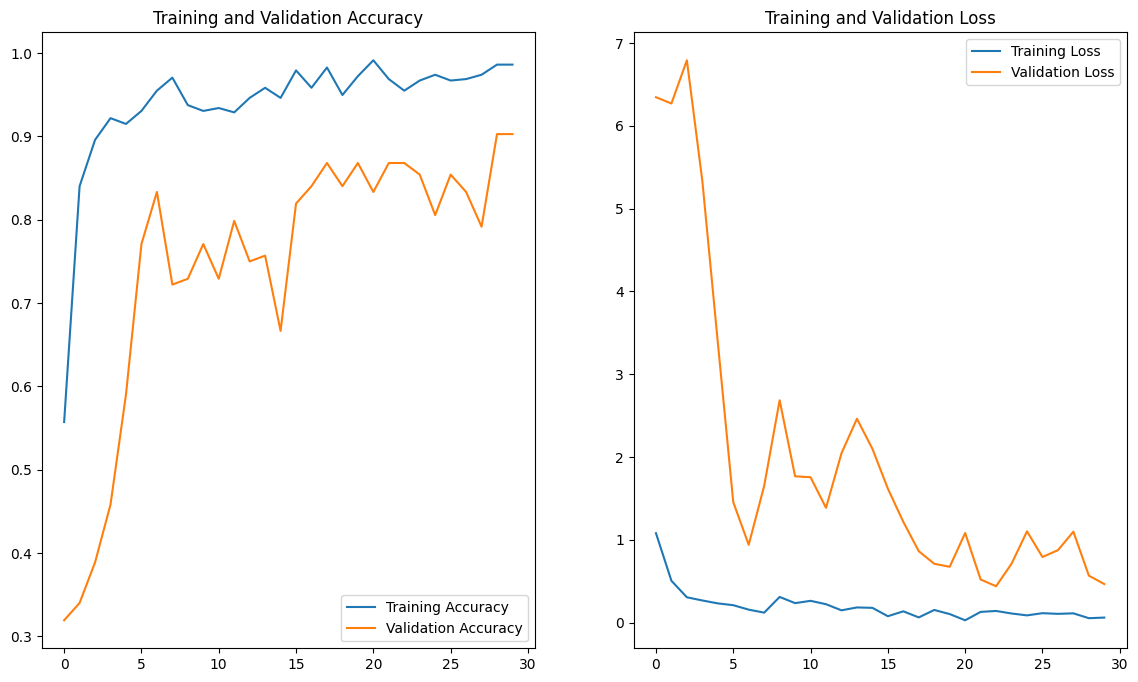

In [41]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(history.history["loss"]))

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")

plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                      

In [43]:
model.evaluate(x=val_dataset, return_dict=True)

5/5 [==============================] - 6s 18ms/step - loss: 0.4659 - accuracy: 0.9028


{'loss': 0.46594512462615967, 'accuracy': 0.9027777910232544}

In [44]:
model.save("Cloud_Model04.h5")

In [106]:
model = load_model('/content/Cloud_ModelReal.h5')
model.fit (
    train_dataset,
    validation_data=val_dataset,
    epochs=3,
    verbose=1,
    callbacks=[stop_early]
)

Epoch 1/3
24/24 [==============================] - 37s 1s/step - loss: 0.1745 - accuracy: 0.9661 - val_loss: 0.5806 - val_accuracy: 0.9010
Epoch 2/3
24/24 [==============================] - 29s 941ms/step - loss: 0.1597 - accuracy: 0.9635 - val_loss: 0.7514 - val_accuracy: 0.8906
Epoch 3/3
24/24 [==============================] - 28s 946ms/step - loss: 0.2007 - accuracy: 0.9375 - val_loss: 1.5144 - val_accuracy: 0.7656


In [107]:
model.save('Cloud_ModelReal.h5')

In [108]:
from keras.models import load_model
import cv2
import numpy as np

pred_model = load_model('/content/Cloud_ModelReal.h5')

In [109]:
import cv2
import numpy as np
import os

In [110]:
img = cv2.imread('/content/drive/MyDrive/superai/train_data/6/fef86b83eba0c9a7a6b113976ff6cbdb.jpg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = pred_model.predict(img)

print(np.where(classes[0] == max(classes[0]))[0][0])

1/1 [==============================] - 0s 458ms/step
6


In [111]:
test_list = os.listdir('/content/hackathon-online-cloud-recognition/images/test')

In [112]:
submist_list = []

In [113]:
for i in test_list:

  image_path = '/content/hackathon-online-cloud-recognition/images/test/' + str(i)
  img_ = cv2.imread('/content/drive/MyDrive/superai/test_data_gray/' + str(i) + '.jpg')


  if np.sum(remove_sky(image_path)) < 3000:
    submist_list.append([str(i), 5])

  elif np.sum(remove_sky(image_path)) > 2200000:
    submist_list.append([str(i), 6])

  else:
    img = cv2.resize(img_,(64,64))
    img = np.reshape(img,[1,64,64,3])

    # print(img)
    # plt.subplot(121),plt.imshow(img_,cmap = 'gray')

    classes = pred_model.predict(img)
    print(np.where(classes[0] == max(classes[0])))
    submist_list.append([str(i), np.where(classes[0] == max(classes[0]))[0][0]])

1/1 [==============================] - 0s 23ms/step
(array([1]),)
1/1 [==============================] - 0s 22ms/step
(array([3]),)
1/1 [==============================] - 0s 21ms/step
(array([4]),)
1/1 [==============================] - 0s 22ms/step
(array([1]),)
1/1 [==============================] - 0s 22ms/step
(array([6]),)
1/1 [==============================] - 0s 21ms/step
(array([0]),)
1/1 [==============================] - 0s 24ms/step
(array([6]),)
1/1 [==============================] - 0s 22ms/step
(array([0]),)
1/1 [==============================] - 0s 29ms/step
(array([0]),)
1/1 [==============================] - 0s 27ms/step
(array([6]),)
1/1 [==============================] - 0s 23ms/step
(array([1]),)
1/1 [==============================] - 0s 23ms/step
(array([1]),)
1/1 [==============================] - 0s 36ms/step
(array([0]),)
1/1 [==============================] - 0s 42ms/step
(array([4]),)
1/1 [==============================] - 0s 31ms/step
(array([1]),)
1/1 [=====

In [114]:
len(submist_list)

700

In [115]:
print(submist_list)

[['2cfaf3269ca854454418223391a14bbc.jpg', 1], ['97d7744a3ba05cf531fba233b400efca.jpg', 3], ['8beef351ac44135c291794b43bf084bf.jpg', 4], ['0bd828876dc51a1527059b0bc927fe4b.jpg', 1], ['5ab71f7305ecb16cf414fbe64275fa6b.jpg', 6], ['60e470d55490513428b1b334f3eceb0a.jpg', 0], ['2466aa31ffa2d46957af00710a62b64a.jpg', 6], ['26e88d092b0a287f1f87a191d9b8716f.jpg', 5], ['8c790cad9b4f170bf012796f3f17f1dd.jpg', 0], ['2b12b01ed3da176375a4d47b6b123ca4.jpg', 0], ['94b214de61ae177ed25843388238e655.jpg', 6], ['4ae1fb4de27ed6b269aeec965df16879.jpg', 1], ['2d37ba1d95c1d9da6edbd14f1d4c8405.jpg', 1], ['3d57f0d319106cbd337b784cd1841d2a.jpg', 0], ['5aba550729f76b2ffe6476c58c38c908.jpg', 4], ['6f5df34e3684c4d9de29beb708a2afc7.jpg', 1], ['9d4f4cfb5426f991a2c308901c24a439.jpg', 1], ['3f49439c56bc3ffc5c29a2c12be209e0.jpg', 6], ['9664e8900e3270ec356182c94f55999e.jpg', 5], ['3fcfd7b5230b706c51408a8b28f4eb8f.jpg', 5], ['8d34f4f1e04f786840aeec1516cd45e3.jpg', 1], ['30662452b665c867b81b9233974346cb.jpg', 4], ['2f8ad76

In [116]:
# for item in submist_list:
#     filename = item[0]
#     modified_filename = filename.rsplit(".jpg", 1)[0]
#     item[0] = modified_filename
# print(submist_list)

In [117]:
import pandas as pd

In [118]:
submist_csv = pd.read_csv('/content/hackathon-online-cloud-recognition/submit.csv')

In [119]:
for k in range(len(submist_csv)):
  print(submist_csv['id'][k])

3b46f6ebe56ab934da921e184915c03b.jpg
9f76ca6c0ef7b1190ea35e61755e00ef.jpg
56ed4b7fcd81e9eaed5124ad06360b2f.jpg
1415f3f052d1ec4d6d2d37f8e0e5984c.jpg
85f426446bb6c35ccf51609daa25d1b3.jpg
3a4e7ff978eeeeb03003dbdbeea94b0b.jpg
2189dfdc911aa2840181d51a73a554fc.jpg
0aed28aa4adbbb45eda57a1654605162.jpg
8d5c489b8ef64da5781607cbf4076615.jpg
9e370835fe9b08bc626203c333bdb81f.jpg
8018790439ade243d57ae2ce0d174c2f.jpg
6d37387e287b0f1b8fbaa68ff65db55f.jpg
0b6eb5f26834f2f83fbf516bacc9bf5d.jpg
2b7436fdf395ed6416839958592e5779.jpg
7c261074231793289b16566ddb151e7c.jpg
7a27b3b819de15c19789b0b5332eb157.jpg
3f7ca644cedb994b0cc60ccd21a12a24.jpg
17b1b2b8d2e5bbcf2abd38b7eecb3731.jpg
2f764bd376d3209572af16f49c90a1ed.jpg
9f9bbd7bfda9451fbaa62ca107009eeb.jpg
9d4f4cfb5426f991a2c308901c24a439.jpg
2bf9eeb48eb60e24f9b913e849fb3037.jpg
1c0c8a041490727627bf83abbbde4318.jpg
1ffbbc264860ee5402d914b30cfd0fc8.jpg
8c4f0fb28d548daef68f4badf72eb36a.jpg
5fa3a9282cd85c7cf597c99c0ffb4236.jpg
165f00d42b0967c46d58ceb72a52f823.jpg
5

In [120]:
for i in range(len(submist_list)):
  for k in range(len(submist_csv)):
    if submist_list[i][0] == submist_csv['id'][k]:
      submist_csv['predict'][k] = submist_list[i][1]
      break

submist_csv.to_csv('submist1.csv')

<ipython-input-120-25bfba0f2722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submist_csv['predict'][k] = submist_list[i][1]
